In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import matplotlib as mtl
import numpy as np
import scipy
from math import sqrt

import consts
import input_output
import signal_processing
import plotting




def empty_dicts():
    return {current:[] for current in input_output.SHOWCASE_CURRENTS}, {current:[] for current in input_output.SHOWCASE_CURRENTS}


In [2]:
def compare(l:list, comparing_categories:list):
    p_values = []
    infos = []
    for i in range(len(l)):
        for j in range(i+1, len(l)):
            p_values.append(scipy.stats.mannwhitneyu(l[i], l[j])[1])

            infos.append(f'Comparing {comparing_categories[i]} to {comparing_categories[j]}')
    adjusted_pvalues = scipy.stats.false_discovery_control(p_values)
    for info, ap in zip(infos, adjusted_pvalues):
        print(info)
        print(ap)

In [ ]:
neurons_dict, astro_dict = empty_dicts()

for m_info in input_output.mouse_infos():

    neurons_activity, astrocytes_activity = signal_processing.get_activity(m_info)
    neurons_peaks, astrocytes_peaks = signal_processing.get_peaks(m_info)
    
    astrocytes_peaks[astrocytes_activity == 0] = np.nan
    astrocytes_peaks[astrocytes_peaks < 2] = np.nan
    neurons_peaks[neurons_activity == 0] = np.nan
    neurons_peaks[neurons_peaks < 2] = np.nan

    astrocytes_peaks_avg = np.nanmean(astrocytes_peaks, axis = 0).flatten()
    neurons_peaks_avg = np.nanmean(neurons_peaks, axis = 0).flatten()

    neurons_dict[m_info['current']].extend(neurons_peaks_avg)
    astro_dict[m_info['current']].extend(astrocytes_peaks_avg)

/tmp/ipykernel_504245/1916429225.py:13: RuntimeWarning: Mean of empty slice
  astrocytes_peaks_avg = np.nanmean(astrocytes_peaks, axis = 0).flatten()
/tmp/ipykernel_504245/1916429225.py:14: RuntimeWarning: Mean of empty slice
  neurons_peaks_avg = np.nanmean(neurons_peaks, axis = 0).flatten()


## A

In [2]:
neurons_first_peaks_list_high = []
astrocytes_first_peaks_list_high = []
neurons_first_peaks_list_low = []
astrocytes_first_peaks_list_low = []

neurons_highest_peaks_list_high = []
astrocytes_highest_peaks_list_high = []
neurons_highest_peaks_list_low = []
astrocytes_highest_peaks_list_low = []

for info in input_output.mouse_infos(currents = 'all'):
    if info['current'] >= 50:
        neurons_first_peaks_list = neurons_first_peaks_list_high
        astrocytes_first_peaks_list = astrocytes_first_peaks_list_high
        neurons_highest_peaks_list = neurons_highest_peaks_list_high
        astrocytes_highest_peaks_list = astrocytes_highest_peaks_list_high
    elif info['current'] <= 20:
        neurons_first_peaks_list = neurons_first_peaks_list_low
        astrocytes_first_peaks_list = astrocytes_first_peaks_list_low
        neurons_highest_peaks_list = neurons_highest_peaks_list_low
        astrocytes_highest_peaks_list = astrocytes_highest_peaks_list_low
    else:
        continue
    neurons_activity, astrocytes_activity = signal_processing.get_activity(info)

    neurons_peaks, astrocytes_peaks = signal_processing.get_peaks(info)

    neurons_first_peak = np.argmax(neurons_activity, axis = 0)
    astrocytes_first_peak = np.argmax(astrocytes_activity, axis = 0)
    neurons_highest_peak = np.argmax(neurons_peaks, axis = 0)
    astrocytes_highest_peak = np.argmax(astrocytes_peaks, axis = 0)

    neurons_first_peaks_list.extend(neurons_first_peak[np.any(neurons_activity, axis = 0)])
    astrocytes_first_peaks_list.extend(astrocytes_first_peak[np.any(astrocytes_activity, axis = 0)])
    neurons_highest_peaks_list.extend(neurons_highest_peak[np.any(neurons_activity, axis = 0)])
    astrocytes_highest_peaks_list.extend(astrocytes_highest_peak[np.any(astrocytes_activity, axis = 0)])

neurons_first_peaks_list_high = np.array(neurons_first_peaks_list_high).flatten()
astrocytes_first_peaks_list_high = np.array(astrocytes_first_peaks_list_high).flatten()
neurons_first_peaks_list_low = np.array(neurons_first_peaks_list_low).flatten()
astrocytes_first_peaks_list_low = np.array(astrocytes_first_peaks_list_low).flatten()

_, nh = np.unique(neurons_first_peaks_list_high, return_counts = True)
_, nl = np.unique(neurons_first_peaks_list_low, return_counts = True)
_, ah = np.unique(astrocytes_first_peaks_list_high, return_counts = True)
_, al = np.unique(astrocytes_first_peaks_list_low, return_counts = True)

nh_norm = nh/np.sum(nh)
ah_norm = ah/np.sum(ah)
nl_norm = nl/np.sum(nl)
al_norm = al/np.sum(al)

_, nh2 = np.unique(neurons_highest_peaks_list_high, return_counts = True)
_, nl2 = np.unique(neurons_highest_peaks_list_low, return_counts = True)
_, ah2 = np.unique(astrocytes_highest_peaks_list_high, return_counts = True)
_, al2 = np.unique(astrocytes_highest_peaks_list_low, return_counts = True)

nh2_norm = nh2/np.sum(nh2)
ah2_norm = ah2/np.sum(ah2)
nl2_norm = nl2/np.sum(nl2)
al2_norm = al2/np.sum(al2)


Text(0.5, 0.01, 'Stimulation number')

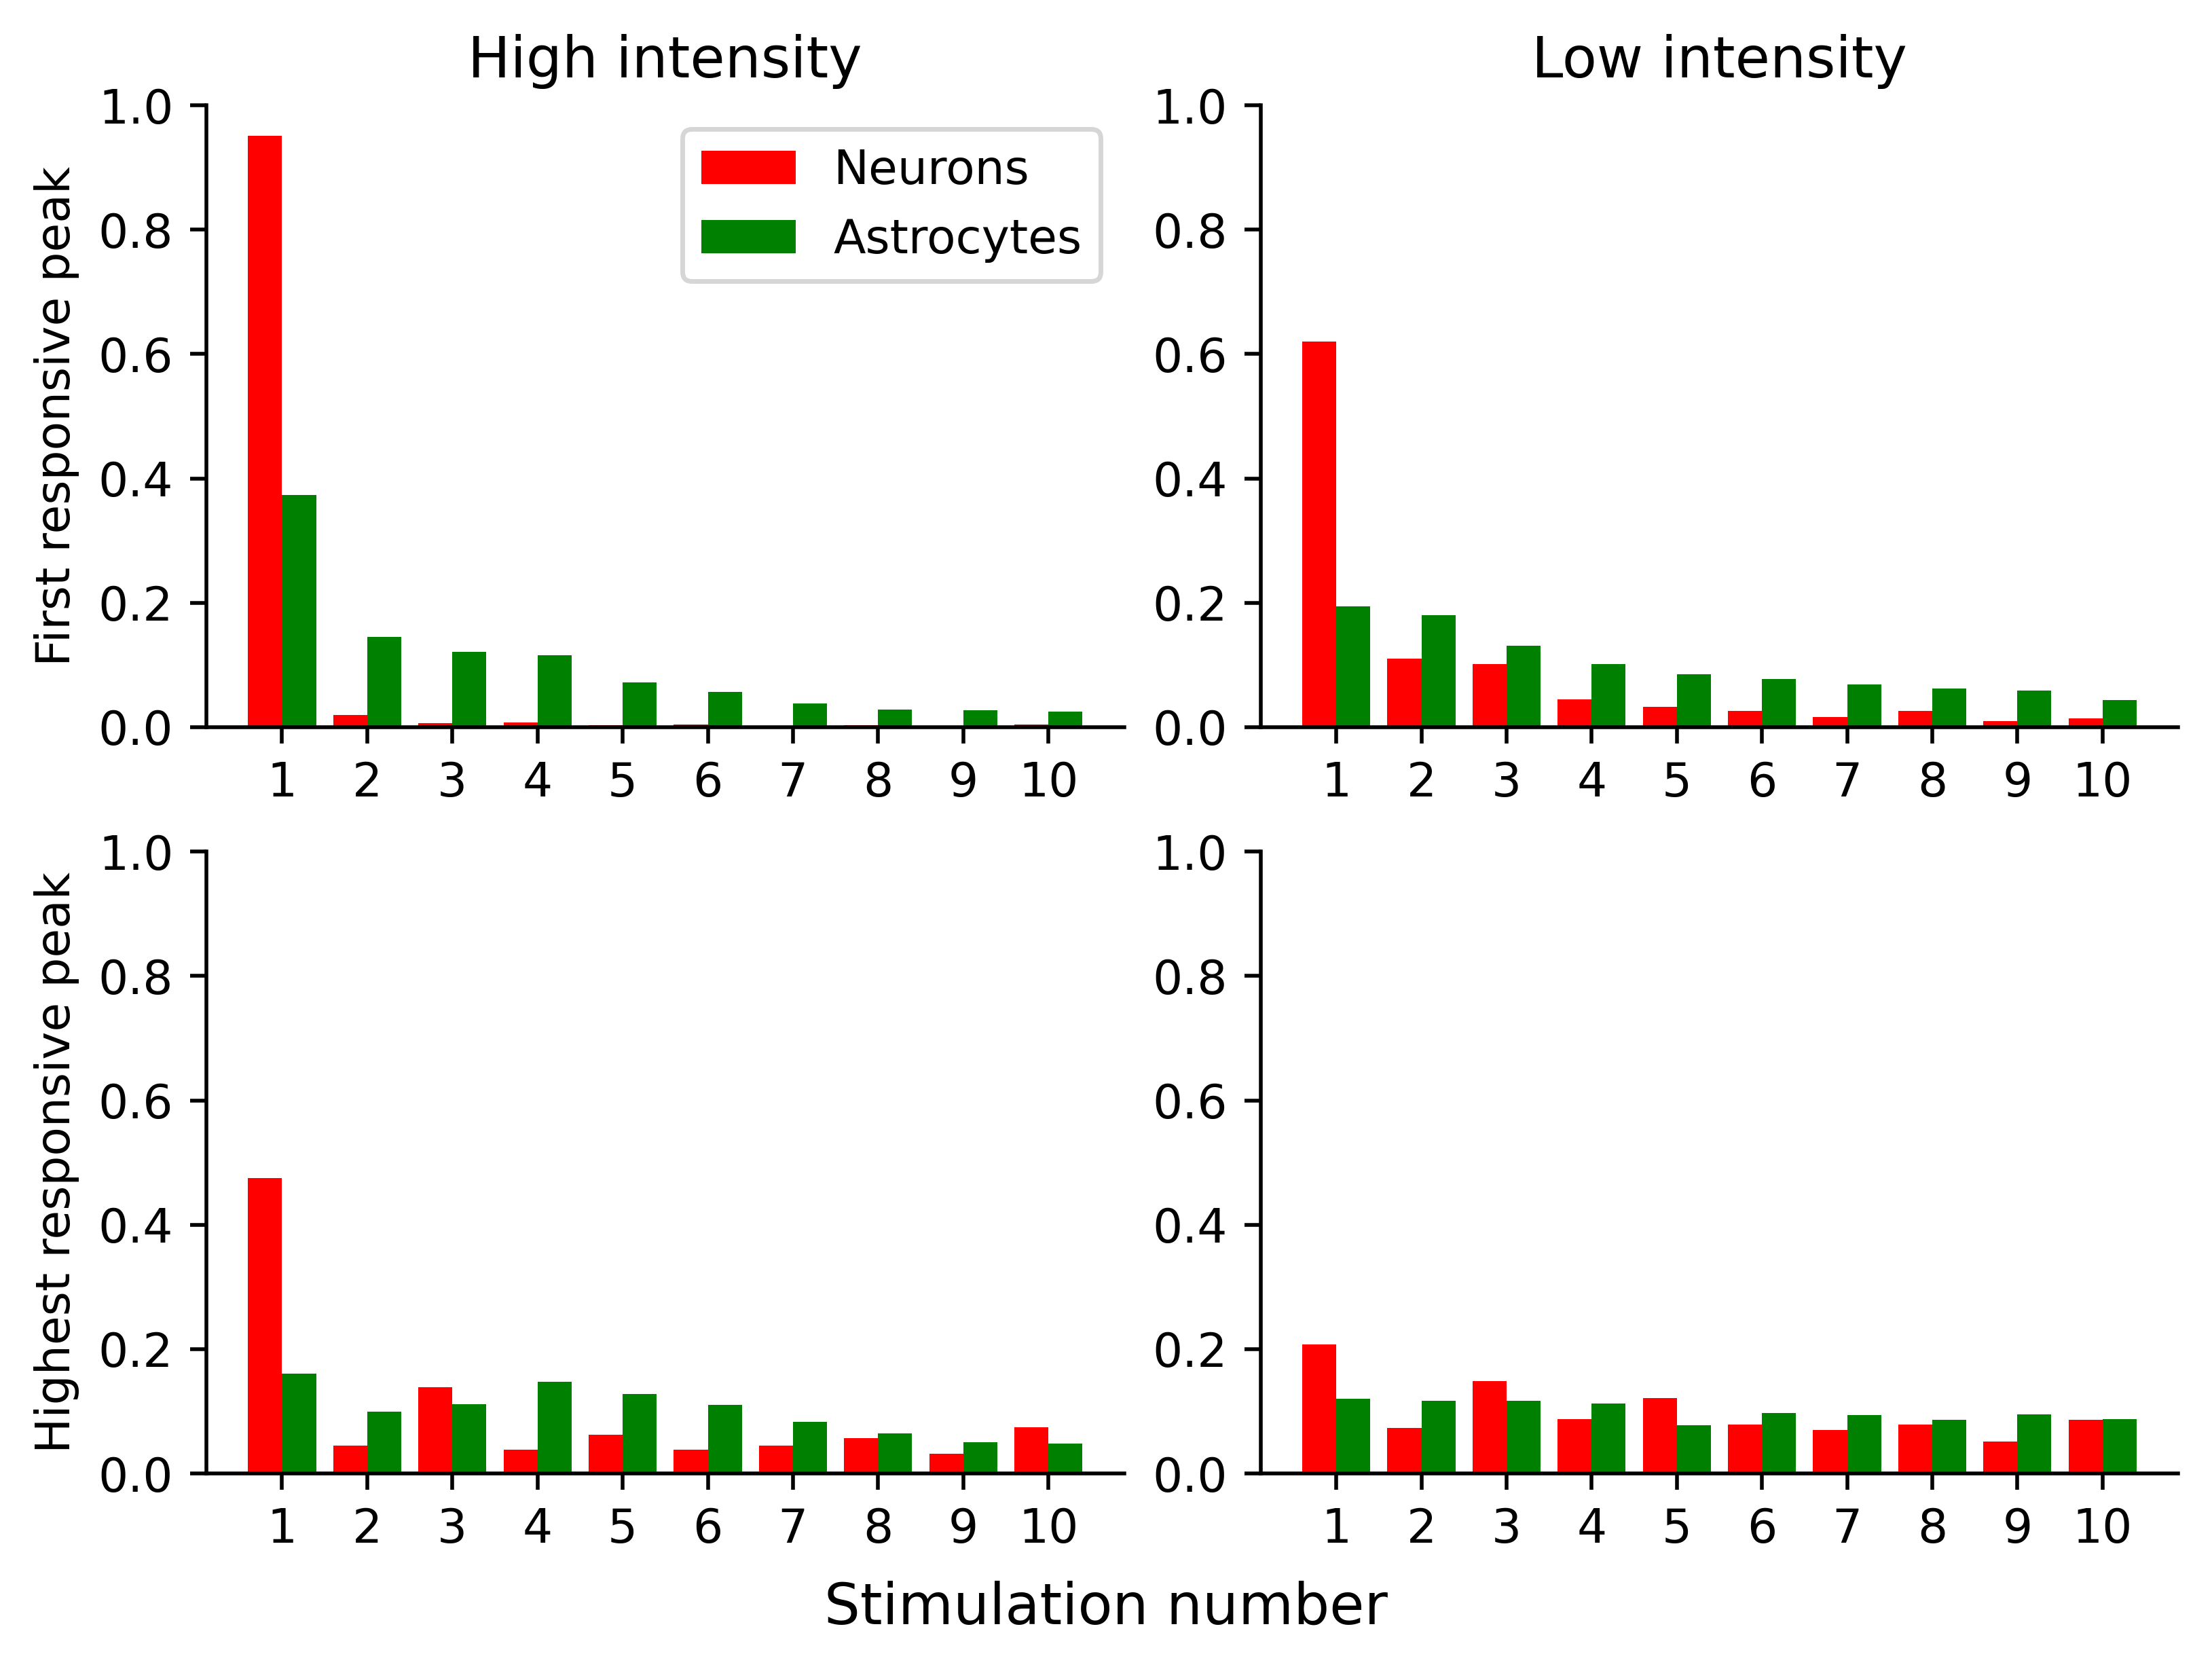

In [3]:
fig, ax = plt.subplots(2, 2, layout = 'compressed', dpi = 500)
x = np.arange(10)+1
width = 0.4

ax[0, 0].bar(x-0.2, nh_norm, color = 'red', width=width, label = 'Neurons')
ax[0, 0].bar(x+0.2, ah_norm, color = 'green', width = width, label = 'Astrocytes')
ax[0, 0].set_ylabel("First responsive peak")
ax[0, 0].set_title("High intensity")

ax[0, 1].bar(x-0.2, nl_norm, color = 'red', width=width)
ax[0, 1].bar(x+0.2, al_norm, color = 'green', width = width)
ax[0, 1].set_title('Low intensity')
ax[1, 0].set_ylabel('Highest responsive peak')

ax[1, 0].bar(x-0.2, nh2_norm, color = 'red', width=width)
ax[1, 0].bar(x+0.2, ah2_norm, color = 'green', width = width)

ax[1, 1].bar(x-0.2, nl2_norm, color = 'red', width=width)
ax[1, 1].bar(x+0.2, al2_norm, color = 'green', width = width)

for a in ax.flat:
    a.set_xticks(np.arange(1, 11))

for axis in ax.flat:
    axis.set_ylim(0, 1)
    for line in ['top','right']:
        axis.spines[line].set_linewidth(0)
ax[0, 0].legend()
fig.supxlabel('Stimulation number')
# nasa.plotting.save_fig(fig, 3, 'Trial of first and highest peak (barplot)')

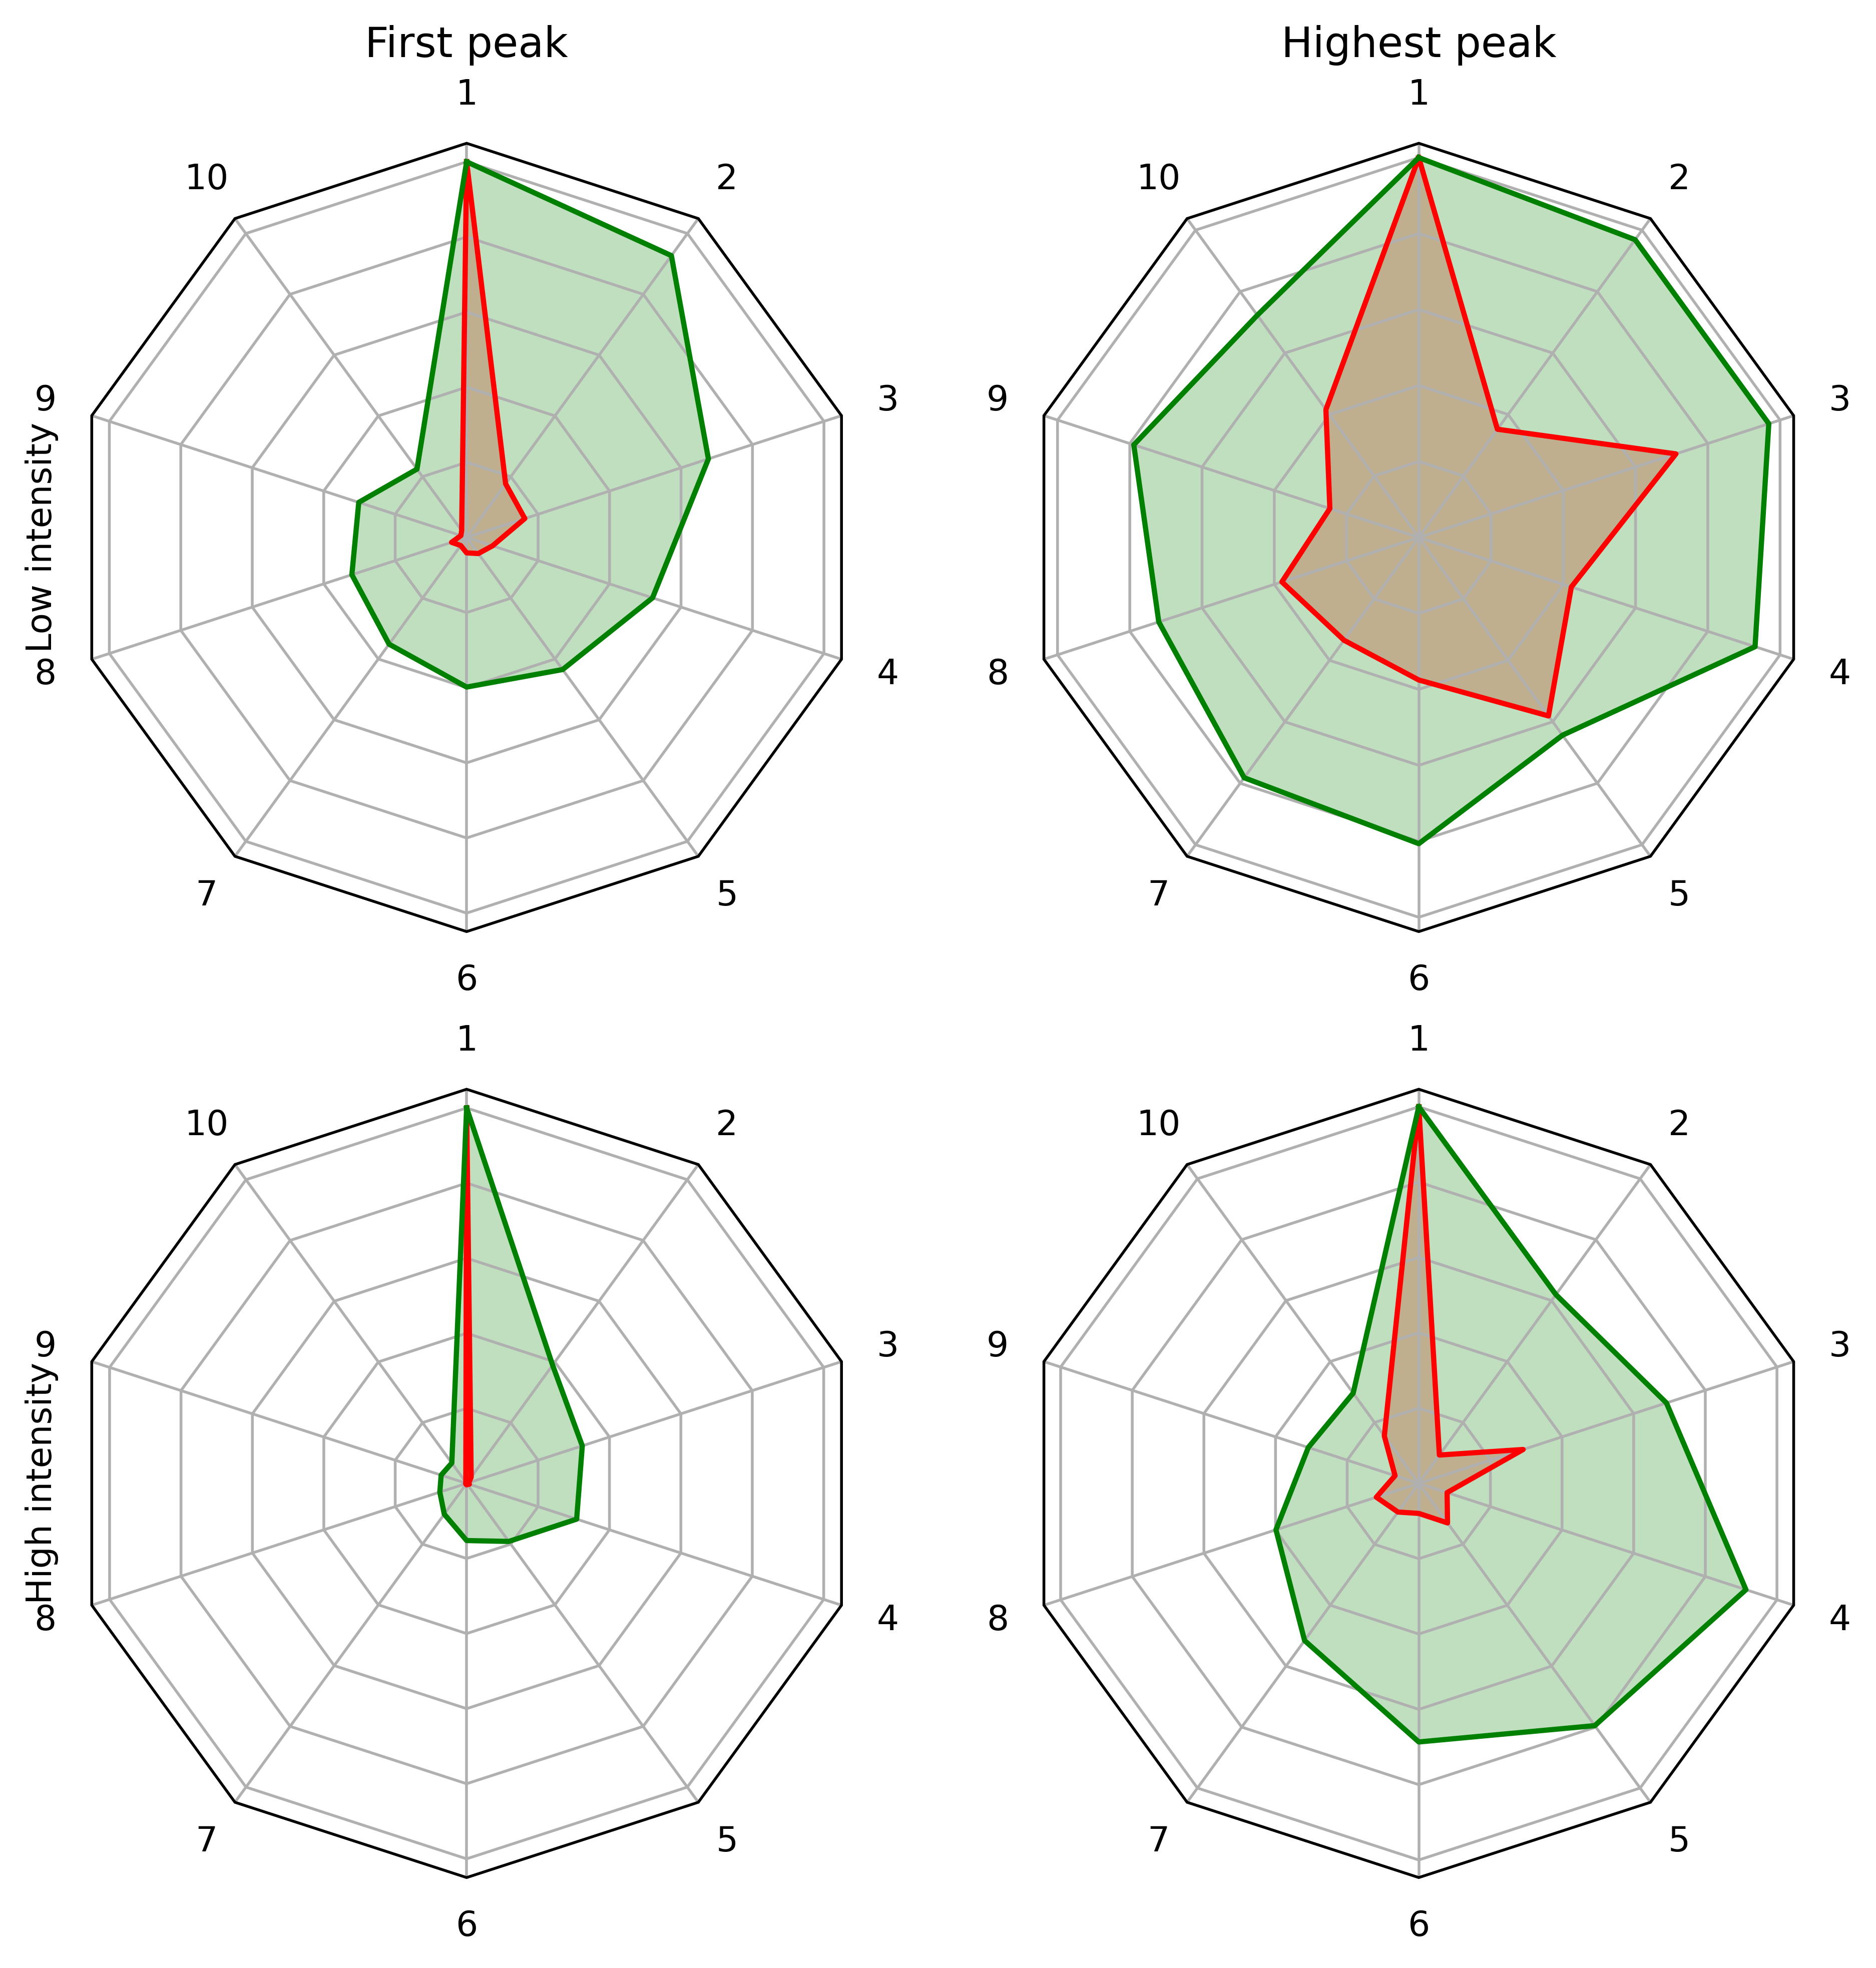

In [6]:
theta = plotting.radar_factory(10, 'polygon')
fig, ax = plt.subplots(2,2, subplot_kw=dict(projection='radar'), figsize = (9,9), dpi= 500)

for axis, data in zip(ax.flat, (((nl, al), (nl2, al2), (nh, ah), (nh2, ah2)))):
    for color, d in zip(('red', 'green'), data):
        d = d/max(d)
        axis.plot(theta, d, color = color)
        axis.fill(theta, d, facecolor = color, alpha = 0.25)
ax[0, 0].set_title('First peak')
ax[0, 0].set_ylabel('Low intensity')
ax[0, 1].set_title('Highest peak')
ax[1, 0].set_ylabel('High intensity')
for axis in ax.flat:
    axis.set_theta_direction(-1)

    axis.set_varlabels(x)
    axis.set_yticklabels([])

## B

In [4]:
neurons_dict, astro_dict = empty_dicts()
for m_info in input_output.mouse_infos():
    neuro_res, astro_res = signal_processing.get_activity(m_info)
    neuro_res = np.sum(neuro_res, axis = 0)
    astro_res = np.sum(astro_res, axis = 0)
    neurons_hist, _ = np.histogram(neuro_res, bins = np.arange(0, 12))
    astrocytes_hist, _ = np.histogram(astro_res, bins = np.arange(0, 12))
    # neurons_activity still has the ten stimulation in time
    nc = 100*neurons_hist/(np.prod(neuro_res.shape)) 
    ac = 100*astrocytes_hist/(np.prod(neuro_res.shape))
    neurons_dict[m_info['current']].append(nc)
    astro_dict[m_info['current']].append(ac)


Text(0.5, 0, 'Number of responsive trials')

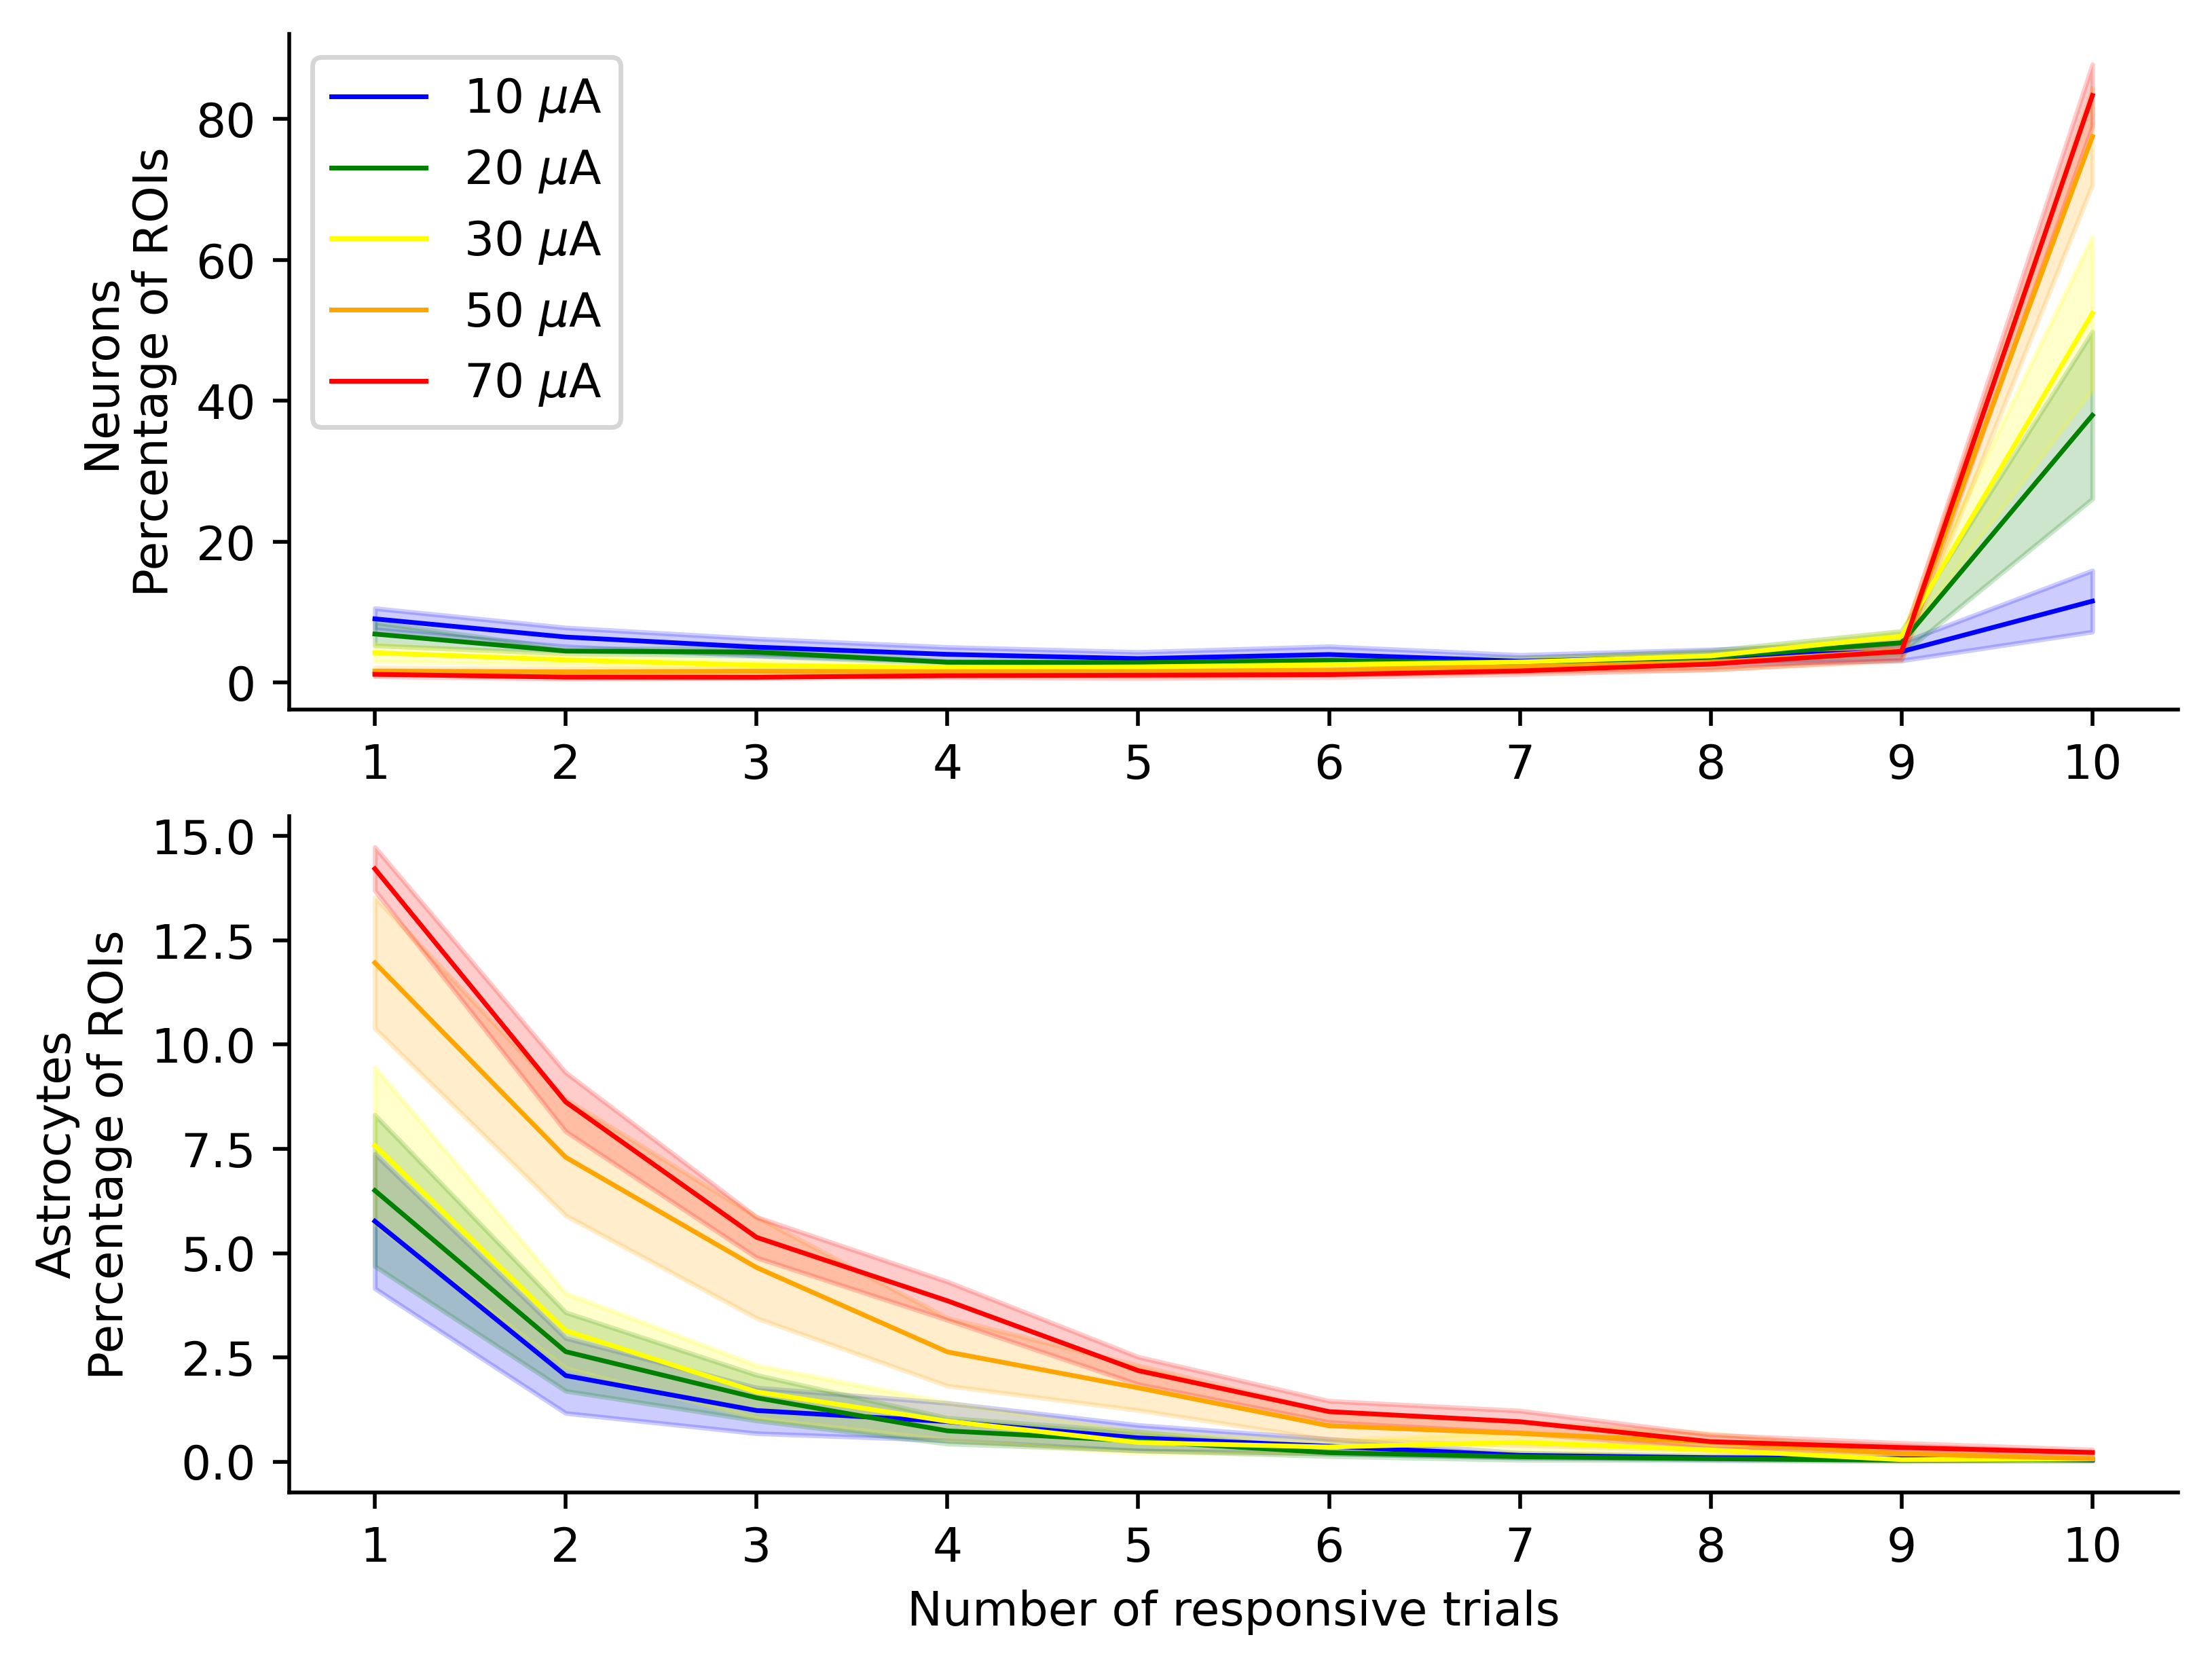

In [9]:
x = np.arange(0, 11)
new_x = np.linspace(1, 10, 100)

keys = sorted([cur for cur in neurons_dict.keys() if cur%10 == 0])
cmap = mtl.colormaps['jet']
colors_list = cmap(np.linspace(0, 1, len(keys)+1))
colors = {
    10 : 'blue',
    20 : 'green',
    30 : 'yellow',
    50 : 'orange',
    70 : 'red'
              }
# for i, cur in enumerate(keys):
#     colors[cur] = colors_list[i]

fig, ax = plt.subplots(2, 1, dpi = 500, layout = "compressed")
for index, d in enumerate((neurons_dict, astro_dict)):
    for cur in keys:
        avg = np.average(d[cur], axis = 0)
        std = np.std(d[cur], axis = 0)
        sem = std/np.sqrt(len(d[cur]))
        std1 = avg + std
        std2 = avg - std  
        sem1, sem2 = avg + sem, avg - sem  
        # avg_curve = scipy.interpolate.PchipInterpolator(x[1:], avg[1:])
        # ax[index].plot(new_x, avg_curve(new_x), label = str(cur) + r" $\mu$A", linewidth = 1)#, color = colors[cur])
        ax[index].plot(x[1:], avg[1:], label = str(cur)+ r" $\mu$A", linewidth = 1, color = colors[cur])
        # upper_curve = scipy.interpolate.PchipInterpolator(x[1:], std1[1:])
        # lower_curve = scipy.interpolate.PchipInterpolator(x[1:], std2[1:])
        # upper_curve = scipy.interpolate.PchipInterpolator(x[1:], sem1[1:])
        # lower_curve = scipy.interpolate.PchipInterpolator(x[1:], sem2[1:])
        # ax[index].fill_between(new_x, lower_curve(new_x), upper_curve(new_x), alpha = 0.2)#, color = colors[cur])
        ax[index].fill_between(x[1:], sem2[1:], sem1[1:], alpha = 0.2, color = colors[cur])
        for axis in ['top','right']:
            ax[index].spines[axis].set_linewidth(0)

    ax[index].set_xticks([i for i in range(1, 11)])
    
ax[0].legend()
ax[0].set_ylabel('Neurons\nPercentage of ROIs')
ax[1].set_ylabel('Astrocytes\nPercentage of ROIs')
ax[1].set_xlabel('Number of responsive trials')


## C

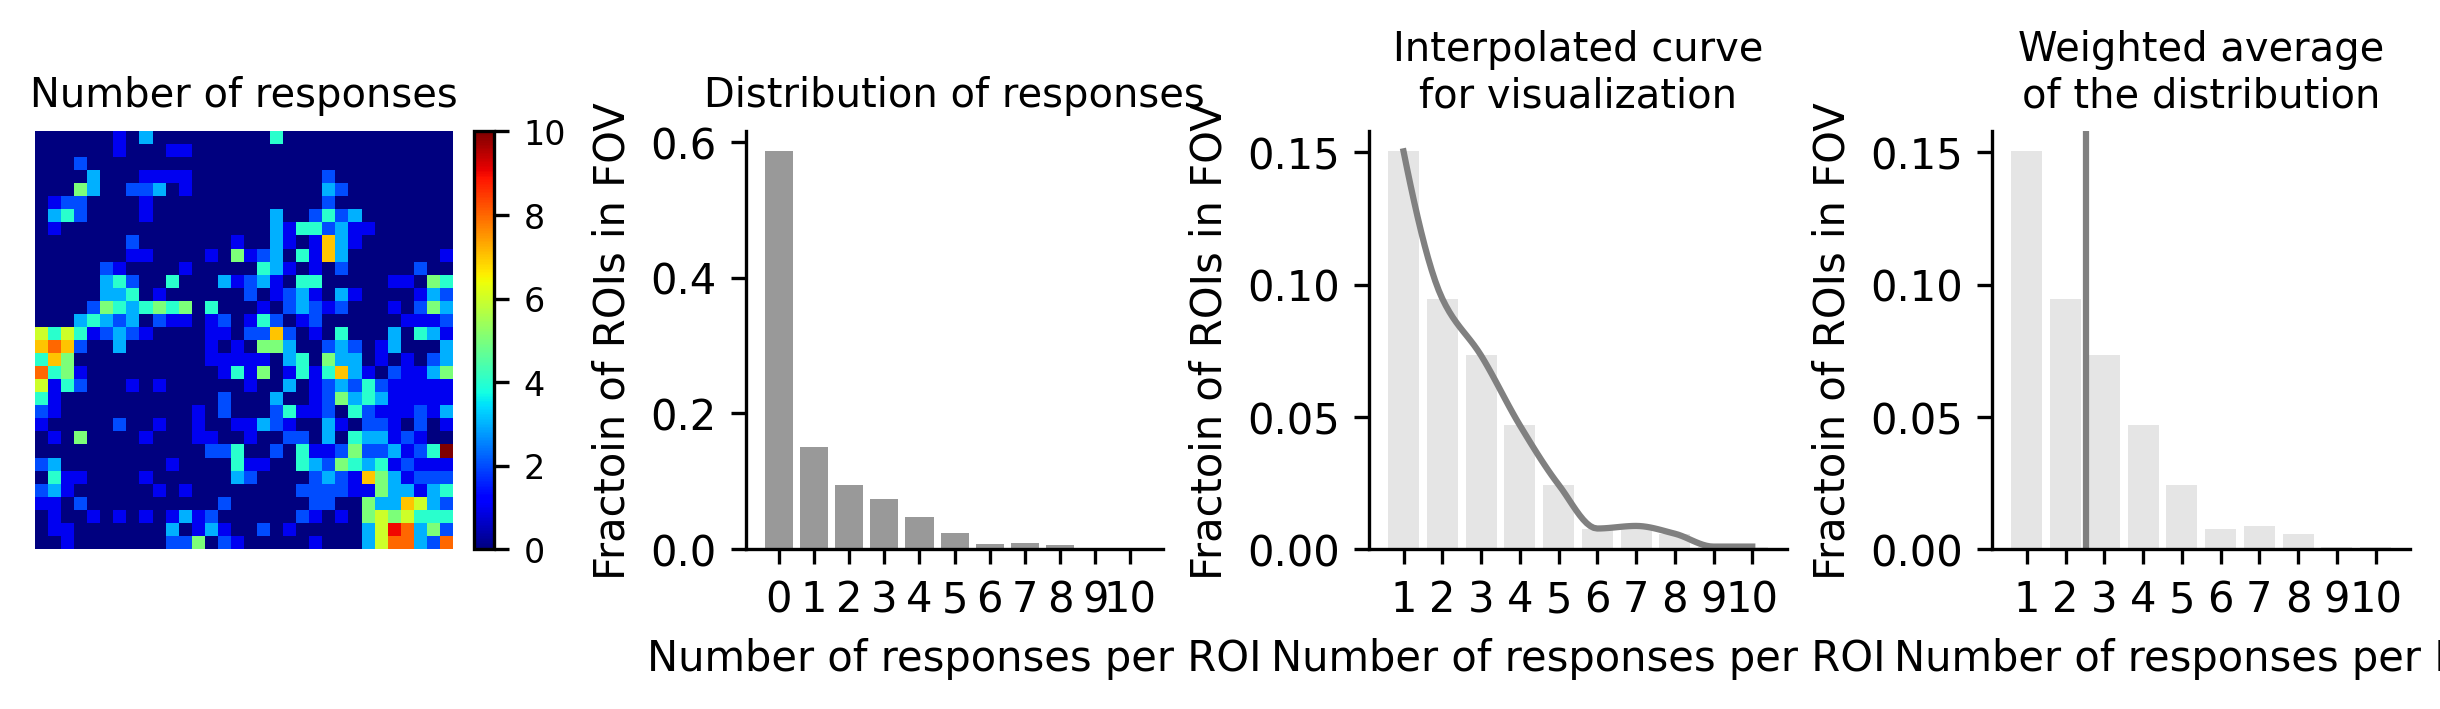

In [10]:
m_info = input_output.load(input_output.EXAMPLE_FILE)
_, astro_res = signal_processing.get_activity(m_info)
astro_res = np.sum(astro_res, axis = 0)
astrocytes_hist, _ = np.histogram(astro_res, bins = np.arange(0, 12))
ac = astrocytes_hist/(np.prod(astro_res.shape))

fig, ax = plt.subplots(1, 4, dpi = 300, layout = 'compressed', figsize = (8,4))
plt.rcParams.update({'font.size': 8})
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8) 

# Responsivness heatmap
a = ax[0]
heatmap = a.imshow(astro_res, cmap = 'jet', vmin = 0, vmax = 10)
fig.colorbar(heatmap)
a.set_xticks([])
a.set_yticks([])
a.set_title('Number of responses')
for axis in ['top','right', 'bottom', 'left']:
    a.spines[axis].set_linewidth(0)

# Histogram
a = ax[1]
x = np.arange(len(ac))
a.bar(x, ac, color = 'gray', alpha = 0.8)
a.set_xticks(np.arange(11))
a.set_xlabel('Number of responses per ROI')
a.set_ylabel('Fractoin of ROIs in FOV')
a.set_title('Distribution of responses')
for axis in ['top','right']:
    a.spines[axis].set_linewidth(0)

# Histogram (transparent with curve)
a = ax[2]
a.bar(x[1:], ac[1:], color = 'gray', alpha = 0.2)
new_x = np.linspace(1, 10, 100)
curve = scipy.interpolate.PchipInterpolator(x[1:], ac[1:])
a.plot(new_x, curve(new_x), color = 'gray')
a.set_xticks(np.arange(1, 11))
a.set_xlabel('Number of responses per ROI')
a.set_ylabel('Fractoin of ROIs in FOV')
a.set_title('Interpolated curve\nfor visualization')
for axis in ['top','right']:
    a.spines[axis].set_linewidth(0)

# Centroid of the curve
a = ax[3]
a.bar(x[1:], ac[1:], color = 'gray', alpha = 0.2)
wavg = np.average(x[1:], weights = ac[1:])
a.axvline(wavg, color = 'gray')
a.set_title('Weighted average\nof the distribution')
a.set_xticks(np.arange(1, 11))
a.set_xlabel('Number of responses per ROI')
a.set_ylabel('Fractoin of ROIs in FOV')
for axis in ['top','right']:
    a.spines[axis].set_linewidth(0)
# save_fig(fig, 'Computing curves diagram')


## D

4.699 ± 1.464 (N = 5)
6.654 ± 2.005 (N = 5)
8.144 ± 0.966 (N = 4)
9.178 ± 0.528 (N = 4)
9.466 ± 0.321 (N = 5)
1.861 ± 0.423 (N = 5)
1.767 ± 0.325 (N = 5)
1.932 ± 0.528 (N = 4)
2.292 ± 0.501 (N = 4)
2.547 ± 0.269 (N = 5)


Text(0.5, 1.0, 'Weighted averages')

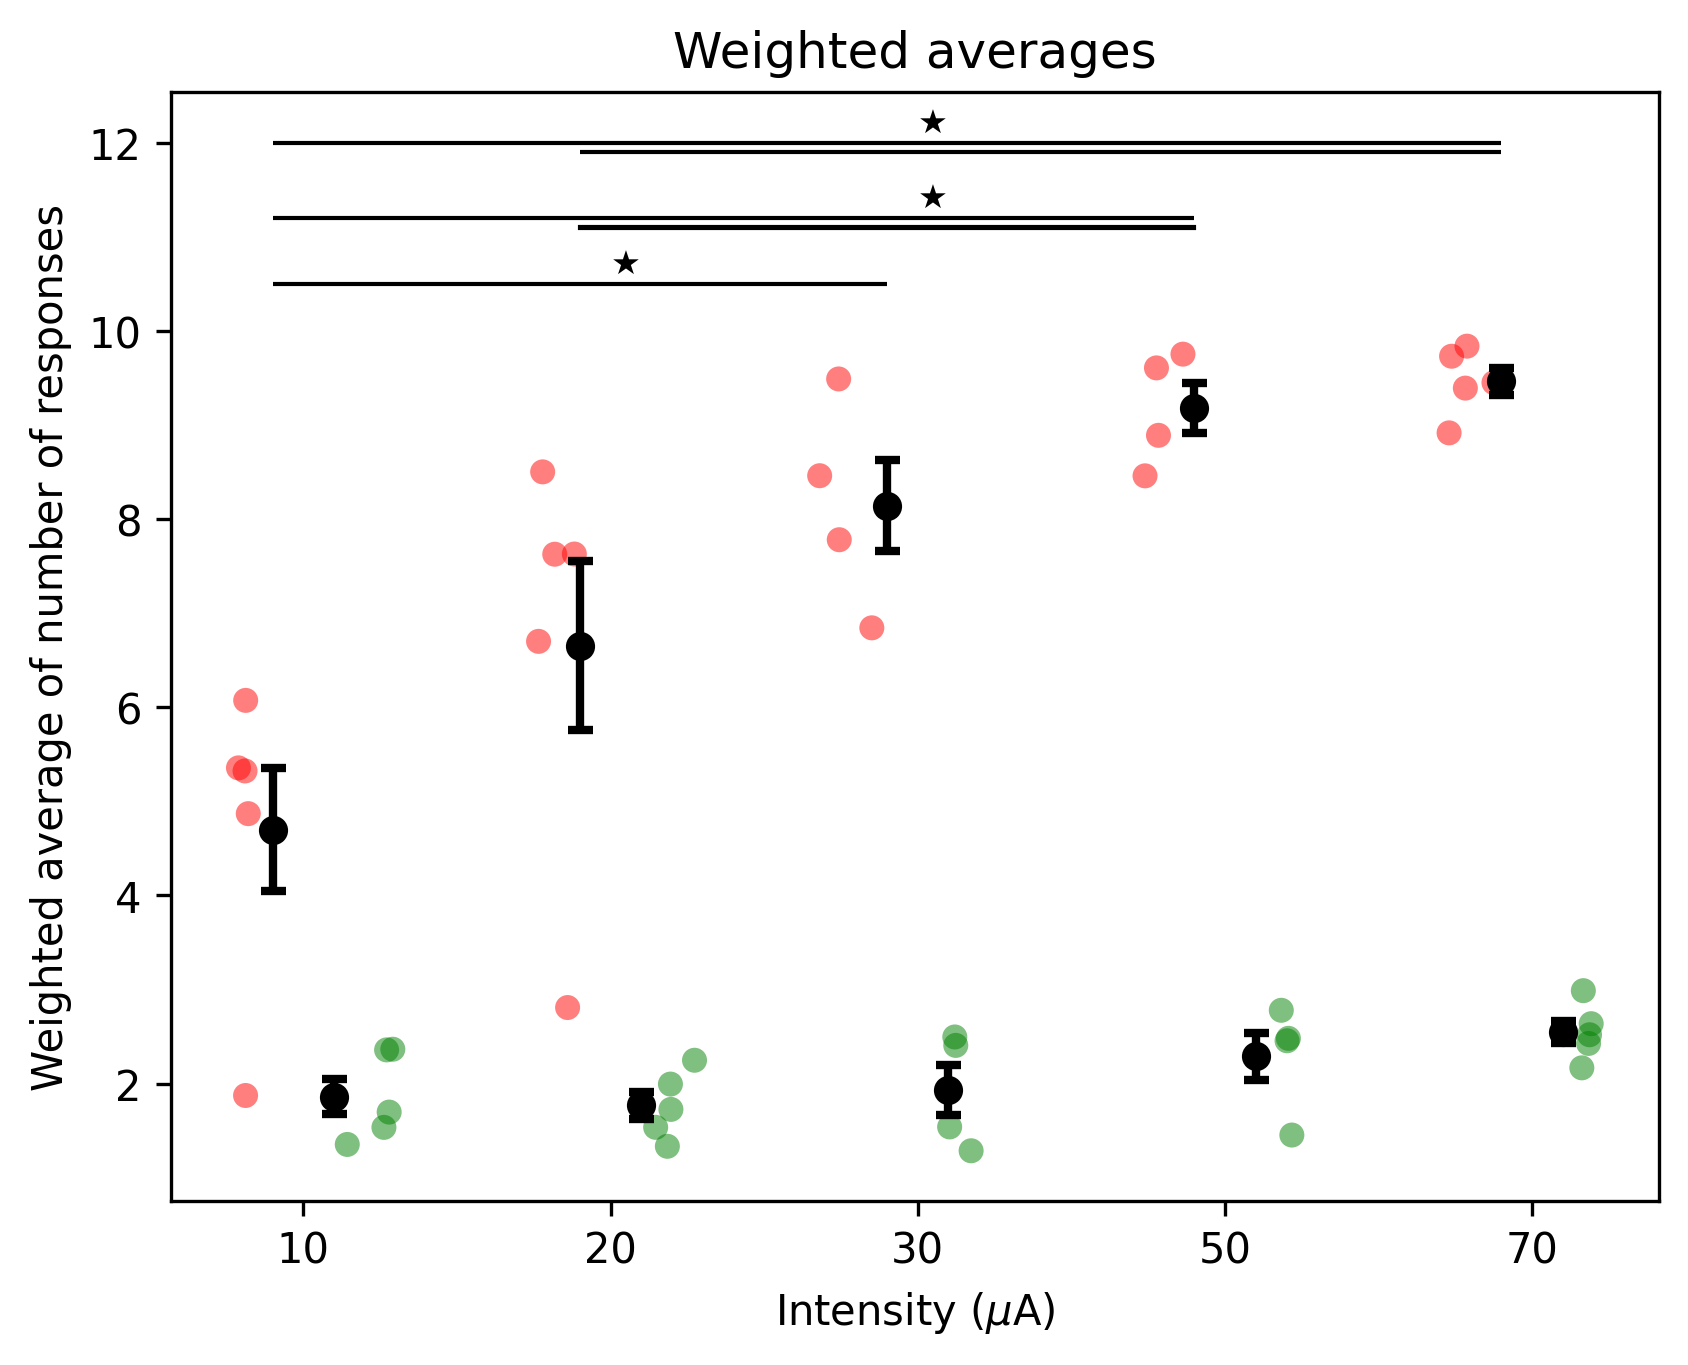

In [5]:
fig, ax = plt.subplots(1, 1, dpi = 300)
cell_offset = [-0.1, 0.1]
line = np.arange(11)
all_wavgs = [[],[]]
for index, d in enumerate((neurons_dict, astro_dict)):
    color = 'green' if index else 'red'
    for i, key in enumerate(sorted(d.keys())):
        
        wavgs = []
        for data in d[key]:
            wavg = np.average(line[1:], weights = data[1:])
            wavgs.append(wavg)
        all_wavgs[index].append(wavgs)
        offset = np.random.normal(2*cell_offset[index], 0.05, len(wavgs))
        ax.scatter(i+ offset,wavgs, color = color, alpha = 0.5, edgecolors='none')

        print(f'{np.average(wavgs):.3f} \u00B1 {np.std(wavgs):.3f} (N = {len(wavgs)})')
        ax.errorbar(
            i + cell_offset[index], 
            np.average(wavgs), 
            yerr = np.std(wavgs)/sqrt(len(wavgs)),
            # yerr = np.std(wavgs)/np.sqrt(len(wavgs))
            fmt = 'o',
            color= 'black',
            capsize =3,
            linewidth = 2,
            capthick = 2)
# ax.set_xticks([0, 1, 2, 3, 4], labels = nasa.consts.CURRENTS)
transform = mtl.transforms.blended_transform_factory(ax.transData, ax.transData)
enchors = [(-0.1, 12), (0.9, 11.9),
           (-0.1, 11.2), (0.9, 11.1),
           (-0.1, 10.5)]
widths = [4, 3,
          3, 2,
          2,]
for anchor, width in zip(enchors, widths):
    rect = ptch.Rectangle(anchor, width=width, height=0.001, color="black", transform=transform)
    ax.add_patch(rect)
ax.text(2, 12.1, "★", fontsize = 8, transform = transform,)
ax.text(2, 11.3, "★", fontsize = 8, transform = transform)
# ax.text(2, 3.6, "★", fontsize = 8, transform = transform)
ax.text(1, 10.6, "★", fontsize = 8, transform = transform)
ax.set_xticks([0, 1, 2, 3, 4], labels = consts.CURRENTS)
ax.set_xlabel(r"Intensity ($\mu$A)")
ax.set_ylabel('Weighted average of number of responses')
ax.set_title('Weighted averages')

# nasa.plotting.save_fig(fig, 3, 'Weighted averages - sem')

In [6]:
scipy.stats.kruskal(*all_wavgs[0]), scipy.stats.kruskal(*all_wavgs[1])

(KruskalResult(statistic=16.48913043478261, pvalue=0.0024283837105989357),
 KruskalResult(statistic=8.466304347826082, pvalue=0.07591519877398557))

## E

In [8]:
neuron_dict, astro_dict = empty_dicts()
for m_info in input_output.mouse_infos():
    neurons_activity, astrocytes_activity = signal_processing.get_activity(m_info)
    n_fraction = 1000*np.sum(neurons_activity, axis = (1, 2))/np.prod(neurons_activity.shape)
    a_fraction = 1000*np.sum(astrocytes_activity, axis = (1, 2))/np.prod(astrocytes_activity.shape)
    neuron_dict[m_info['current']].append(n_fraction)
    astro_dict[m_info['current']].append(a_fraction)

/tmp/ipykernel_137554/1265814952.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend(fontsize = 6)


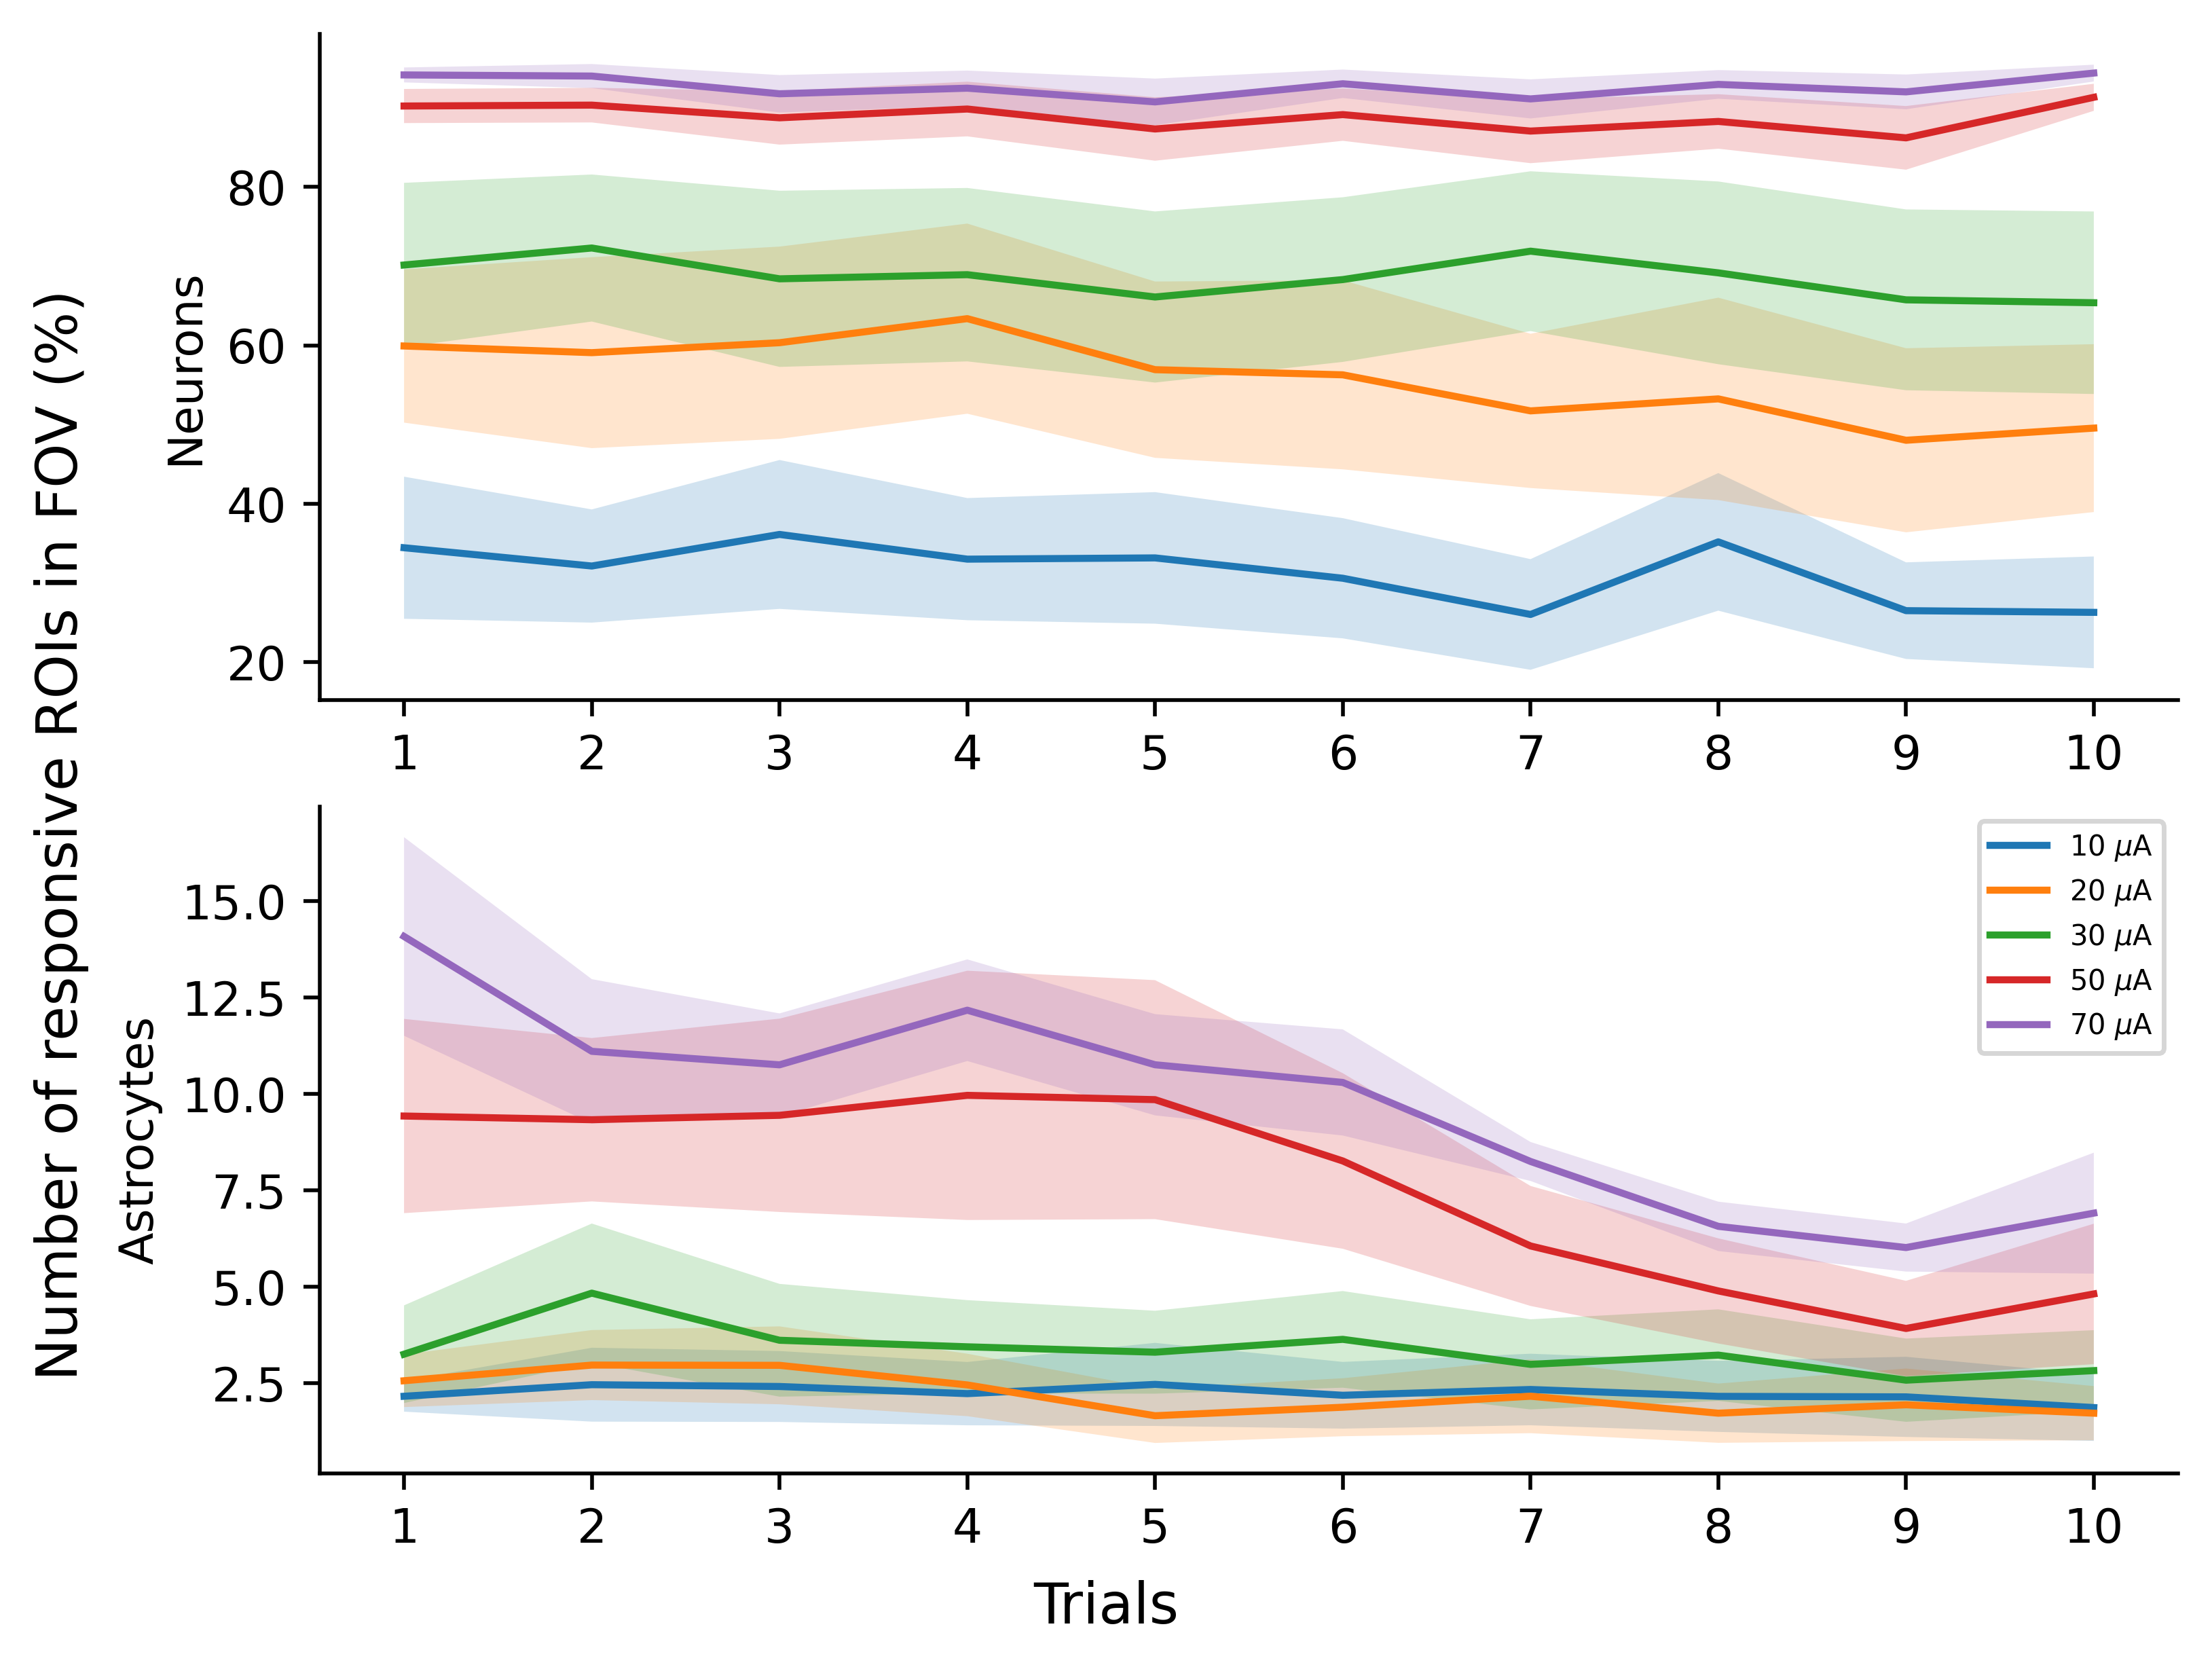

In [ ]:

x = np.arange(1, 11)
fig, ax = plt.subplots(2, 1, dpi = 500, layout = "compressed")
for index, d in enumerate((neuron_dict, astro_dict)):
    for cur in consts.CURRENTS:
        avg = np.average(np.array(d[cur]), axis = 0)
        std = np.std(np.array(d[cur]), axis = 0)
        sem = std/np.sqrt(len(d[cur]))
        sem1 = avg + sem
        sem2 = avg - sem
        ax[index].plot(x, avg, label = str(cur) + r" $\mu$A")
        ax[index].fill_between(x, sem2, sem1, alpha = 0.2)

    for axis in ['top','right']:
        ax[index].spines[axis].set_linewidth(0)
    ax[index].set_xticks([i for i in range(1, 11)])

    ax[1].legend(fontsize = 6)
    ax[0].set_ylabel("Neurons")
    ax[1].set_ylabel("Astrocytes")
    fig.supxlabel("Trials")
    fig.supylabel("Number of responsive ROIs in FOV (%)")

## F

(-1.5, 10.5)

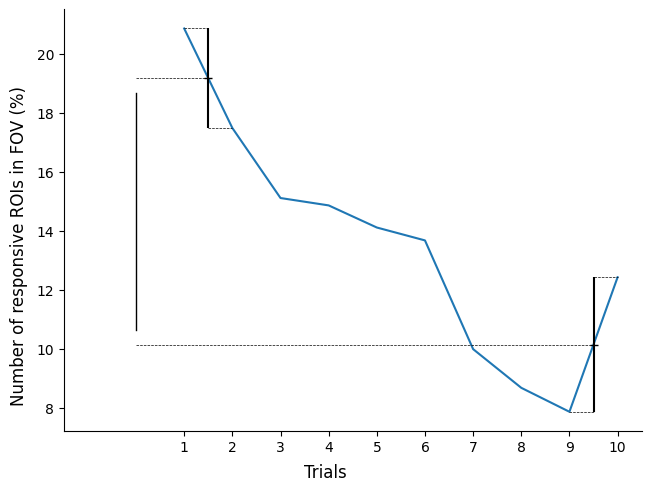

In [11]:
x = np.arange(1, 11)
fig, ax = plt.subplots(1, 1, dpi = 100, layout = "compressed")
d = astro_dict

cur = 70
avg = d[cur][2]
ax.plot(x, avg)

for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.set_xticks([i for i in range(1, 11)])

# ax.legend()
fig.supxlabel("Trials")
fig.supylabel("Number of responsive ROIs in FOV (%)")

avg1 = (avg[0] + avg[1])/2
avg2 = (avg[-1] + avg[-2])/2
ax.errorbar(1.5, avg1, yerr = abs(avg[0] - avg1), fmt = '_', color = 'black')
ax.errorbar(9.5, avg2, yerr = abs(avg[-1] - avg2), fmt = '_', color = 'black')
ax.plot([1, 1.5], [avg[0], avg[0]], color = 'black', ls = '--', linewidth = 0.5)
ax.plot([1.5, 2], [avg[1], avg[1]], color = 'black', ls = '--', linewidth = 0.5)
ax.plot([9, 9.5], [avg[-2], avg[-2]], color = 'black', ls = '--', linewidth = 0.5)
ax.plot([9.5, 10], [avg[-1], avg[-1]], color = 'black', ls = '--', linewidth = 0.5)
ax.plot([0, 1.5], [avg1, avg1], color = 'black', ls = '--', linewidth = 0.5)
ax.plot([0, 9.5], [avg2, avg2], color = 'black', ls = '--', linewidth = 0.5)
ax.plot([0, 0], [avg1-0.5, avg2+0.5], color = 'black', ls = '-', linewidth = 1)
ax.set_xlim(-1.5, 10.5)


In [12]:
l = []
for info in input_output.mouse_infos():
    if info['current'] != 70:
        continue
    _, a_activity = signal_processing.get_activity(info)
    l.append(a_activity)

Text(0.5, 1.0, 'Trial 9')

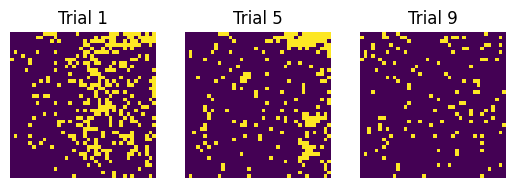

In [13]:
fig, ax = plt.subplots(1, 3)
ast = l[2]
ax[0].imshow(ast[0]>0)
ax[1].imshow(ast[4]>0)
ax[2].imshow(ast[8]>0)
for a in ax.flat:
    a.set_axis_off()
ax[0].set_title('Trial 1')
ax[1].set_title('Trial 5')
ax[2].set_title('Trial 9')

## G

-6.897 ± 12.539 (N = 5)
-10.716 ± 13.970 (N = 5)
-5.654 ± 5.722 (N = 4)
-1.517 ± 1.954 (N = 4)
-0.883 ± 1.121 (N = 5)
-0.304 ± 0.903 (N = 5)
-0.936 ± 0.661 (N = 5)
-1.341 ± 1.053 (N = 4)
-5.013 ± 1.852 (N = 4)
-6.131 ± 3.133 (N = 5)


Text(0.02, 0.5, 'Devrease of responsive ROIs (%pt.)')

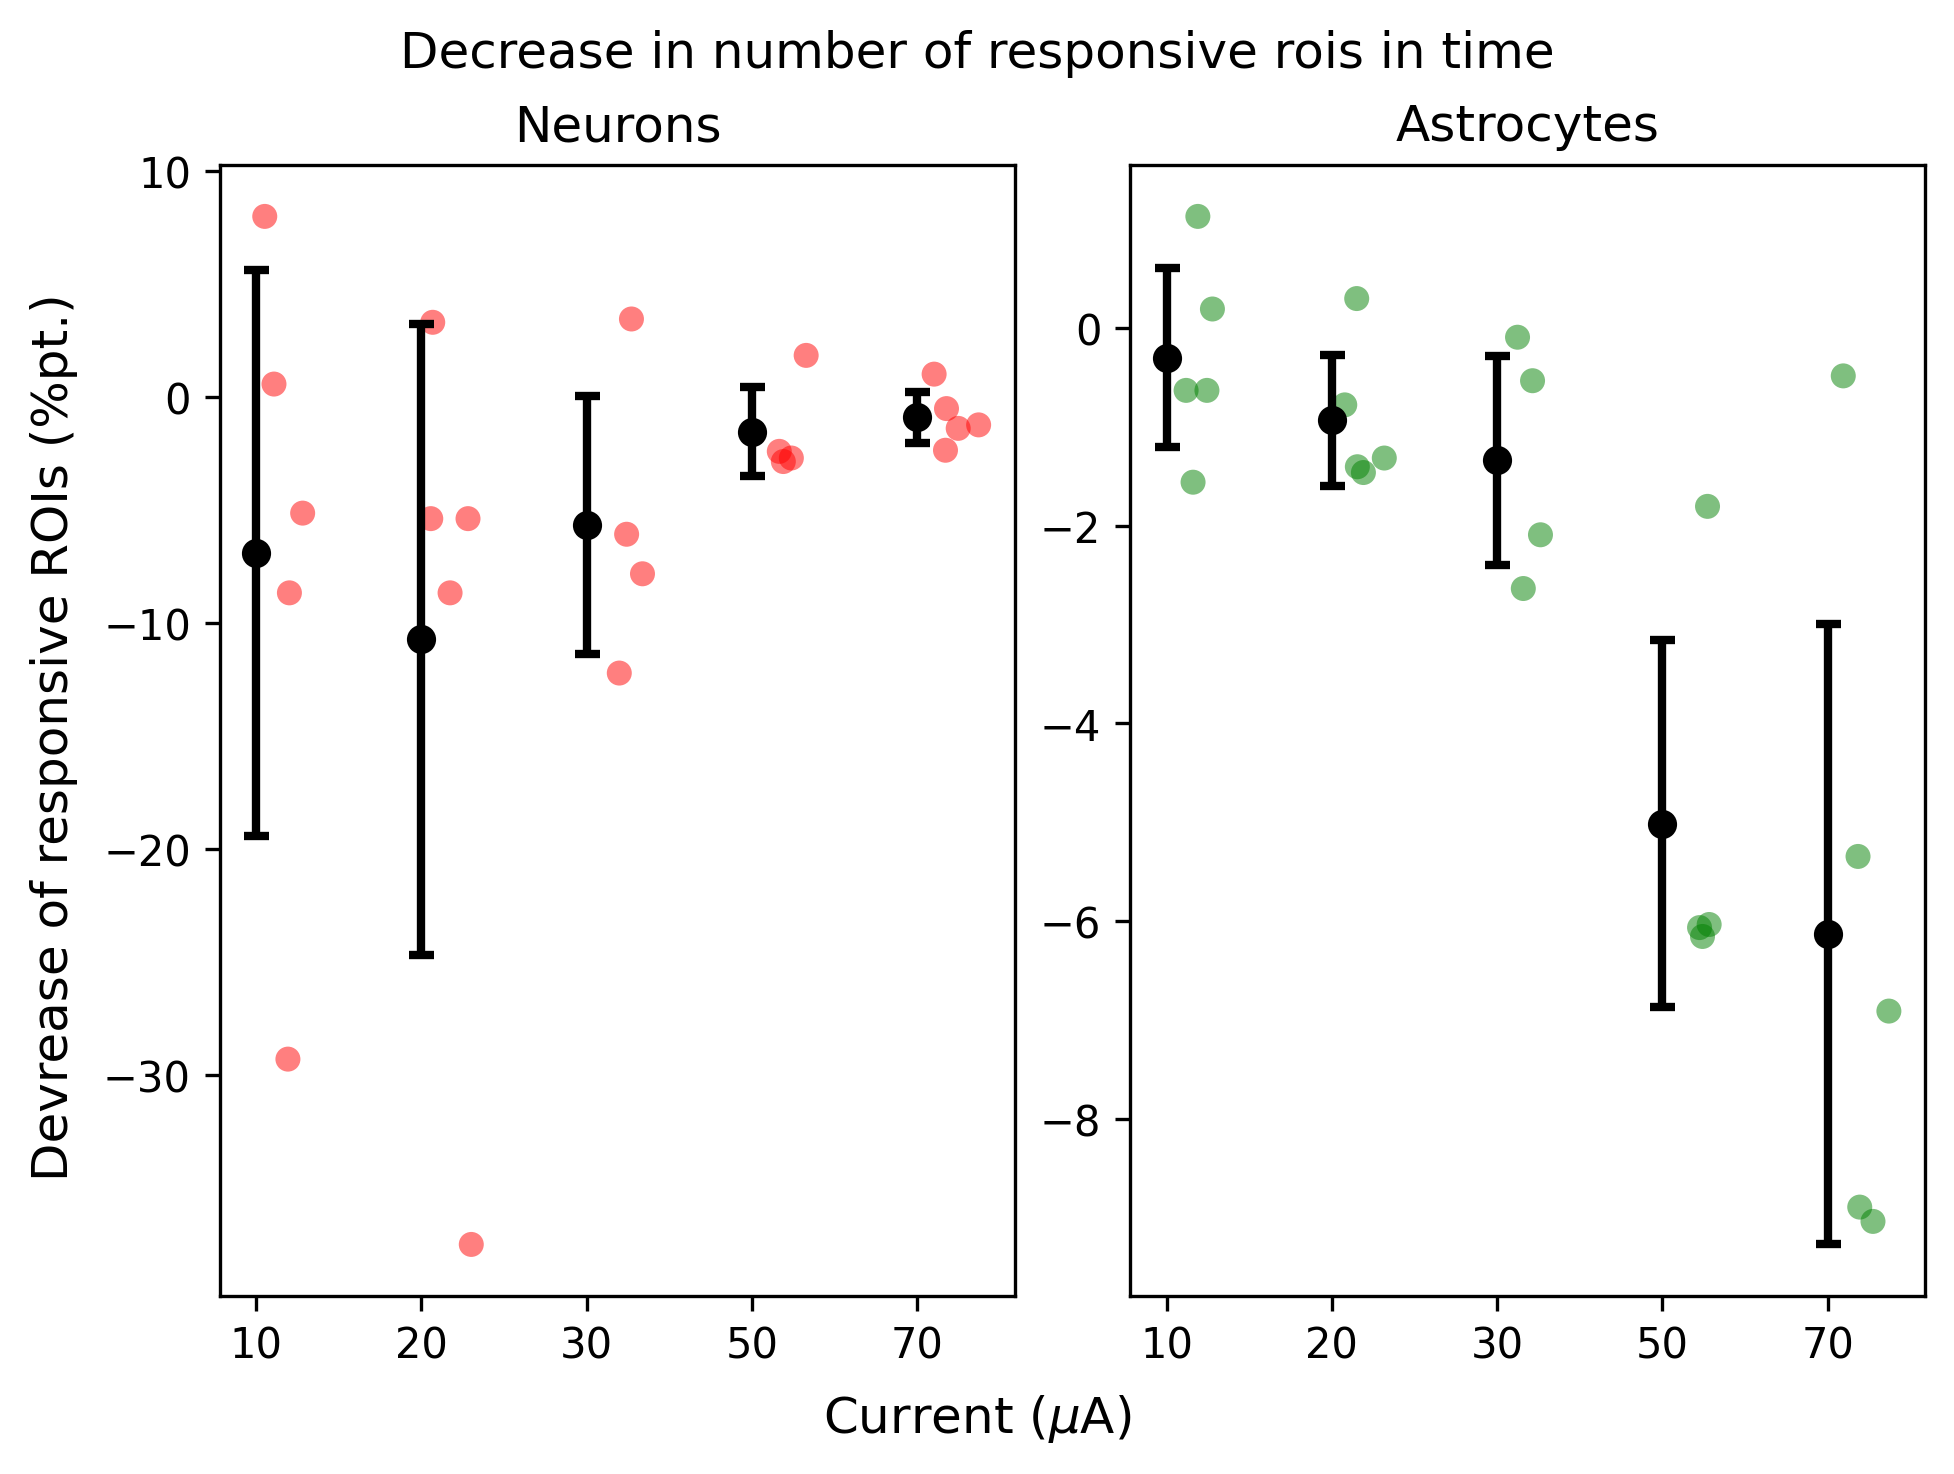

In [14]:
fig, ax = plt.subplots(1, 2, dpi = 300, layout = 'compressed')
ndiffs, adiffs = [],[]
for index, d in enumerate((neuron_dict, astro_dict)):
    color = 'green' if index else 'red'
    for cur_index, current in enumerate(consts.CURRENTS):
        func = lambda line: (line[8] + line[9])/2 - (line[0] + line[1])/2
        diff = np.apply_along_axis(func, axis=1, arr = d[current])
        if index == 0:
            ndiffs.append(diff)
        else:
            adiffs.append(diff)
        ax[index].scatter(
            np.random.normal(cur_index + 0.2, 0.1, len(diff)), 
            diff, 
            color = color, 
            alpha = 0.5,
            edgecolors = 'none')
        ax[index].errorbar(
            cur_index, 
            np.average(diff), 
            yerr = np.std(diff), 
            color = 'black', 
            fmt = 'o', 
            capsize = 3,
            capthick = 2,
            linewidth = 2)
        print(f'{np.average(diff):.3f} \u00B1 {np.std(diff):.3f} (N = {len(diff)})')
    ax[index].set_xticks((0,1, 2, 3, 4), labels = consts.CURRENTS)
fig.supxlabel(r"Current ($\mu$A)")
ax[0].set_title("Neurons")


ax[1].set_title("Astrocytes")
fig.suptitle("Decrease in number of responsive rois in time")
fig.supylabel('Devrease of responsive ROIs (%pt.)')


# nasa.plotting.save_fig(fig, 3, 'Decrease in responsive rois - std')

In [16]:
scipy.stats.kruskal(*ndiffs), scipy.stats.kruskal(*adiffs)

(KruskalResult(statistic=4.023541048466849, pvalue=0.40282929016985697),
 KruskalResult(statistic=11.077212061295103, pvalue=0.02570982580624679))

In [17]:
compare(adiffs, consts.CURRENTS)

Comparing 10 to 20
0.5024566979459193
Comparing 10 to 30
0.5024566979459193
Comparing 10 to 50
0.09725516665681236
Comparing 10 to 70
0.19047619047619047
Comparing 20 to 30
0.7301587301587302
Comparing 20 to 50
0.09725516665681236
Comparing 20 to 70
0.19047619047619047
Comparing 30 to 50
0.19047619047619047
Comparing 30 to 70
0.19047619047619047
Comparing 50 to 70
0.617283950617284


In [ ]:
for adiff, current in zip(adiffs, consts.SHOWCASE_CURRENTS):
    print(current, scipy.stats.wilcoxon(adiff))

for ndiff, current in zip(ndiffs, consts.SHOWCASE_CURRENTS):
    print(current, scipy.stats.wilcoxon(ndiff))

10 WilcoxonResult(statistic=5.0, pvalue=0.625)
20 WilcoxonResult(statistic=1.0, pvalue=0.125)
30 WilcoxonResult(statistic=0.0, pvalue=0.125)
50 WilcoxonResult(statistic=0.0, pvalue=0.125)
70 WilcoxonResult(statistic=0.0, pvalue=0.0625)
10 WilcoxonResult(statistic=4.0, pvalue=0.4375)
20 WilcoxonResult(statistic=1.0, pvalue=0.125)
30 WilcoxonResult(statistic=1.0, pvalue=0.25)
50 WilcoxonResult(statistic=1.0, pvalue=0.25)
70 WilcoxonResult(statistic=2.0, pvalue=0.1875)


In [116]:
diffs = ndiffs
low_current_diffs, high_current_diffs = [], []
low_current_diffs.extend(diffs[0])
low_current_diffs.extend(diffs[1])
low_current_diffs.extend(diffs[2])
high_current_diffs.extend(diffs[3])
high_current_diffs.extend(diffs[4])
scipy.stats.mannwhitneyu(low_current_diffs, high_current_diffs)
# scipy.stats.kruskal(adiffs[0], adiffs[1], adiffs[2])

MannwhitneyuResult(statistic=34.0, pvalue=0.07245970586458506)

Text(0.02, 0.5, 'Devrease of responsive ROIs (%pt.)')

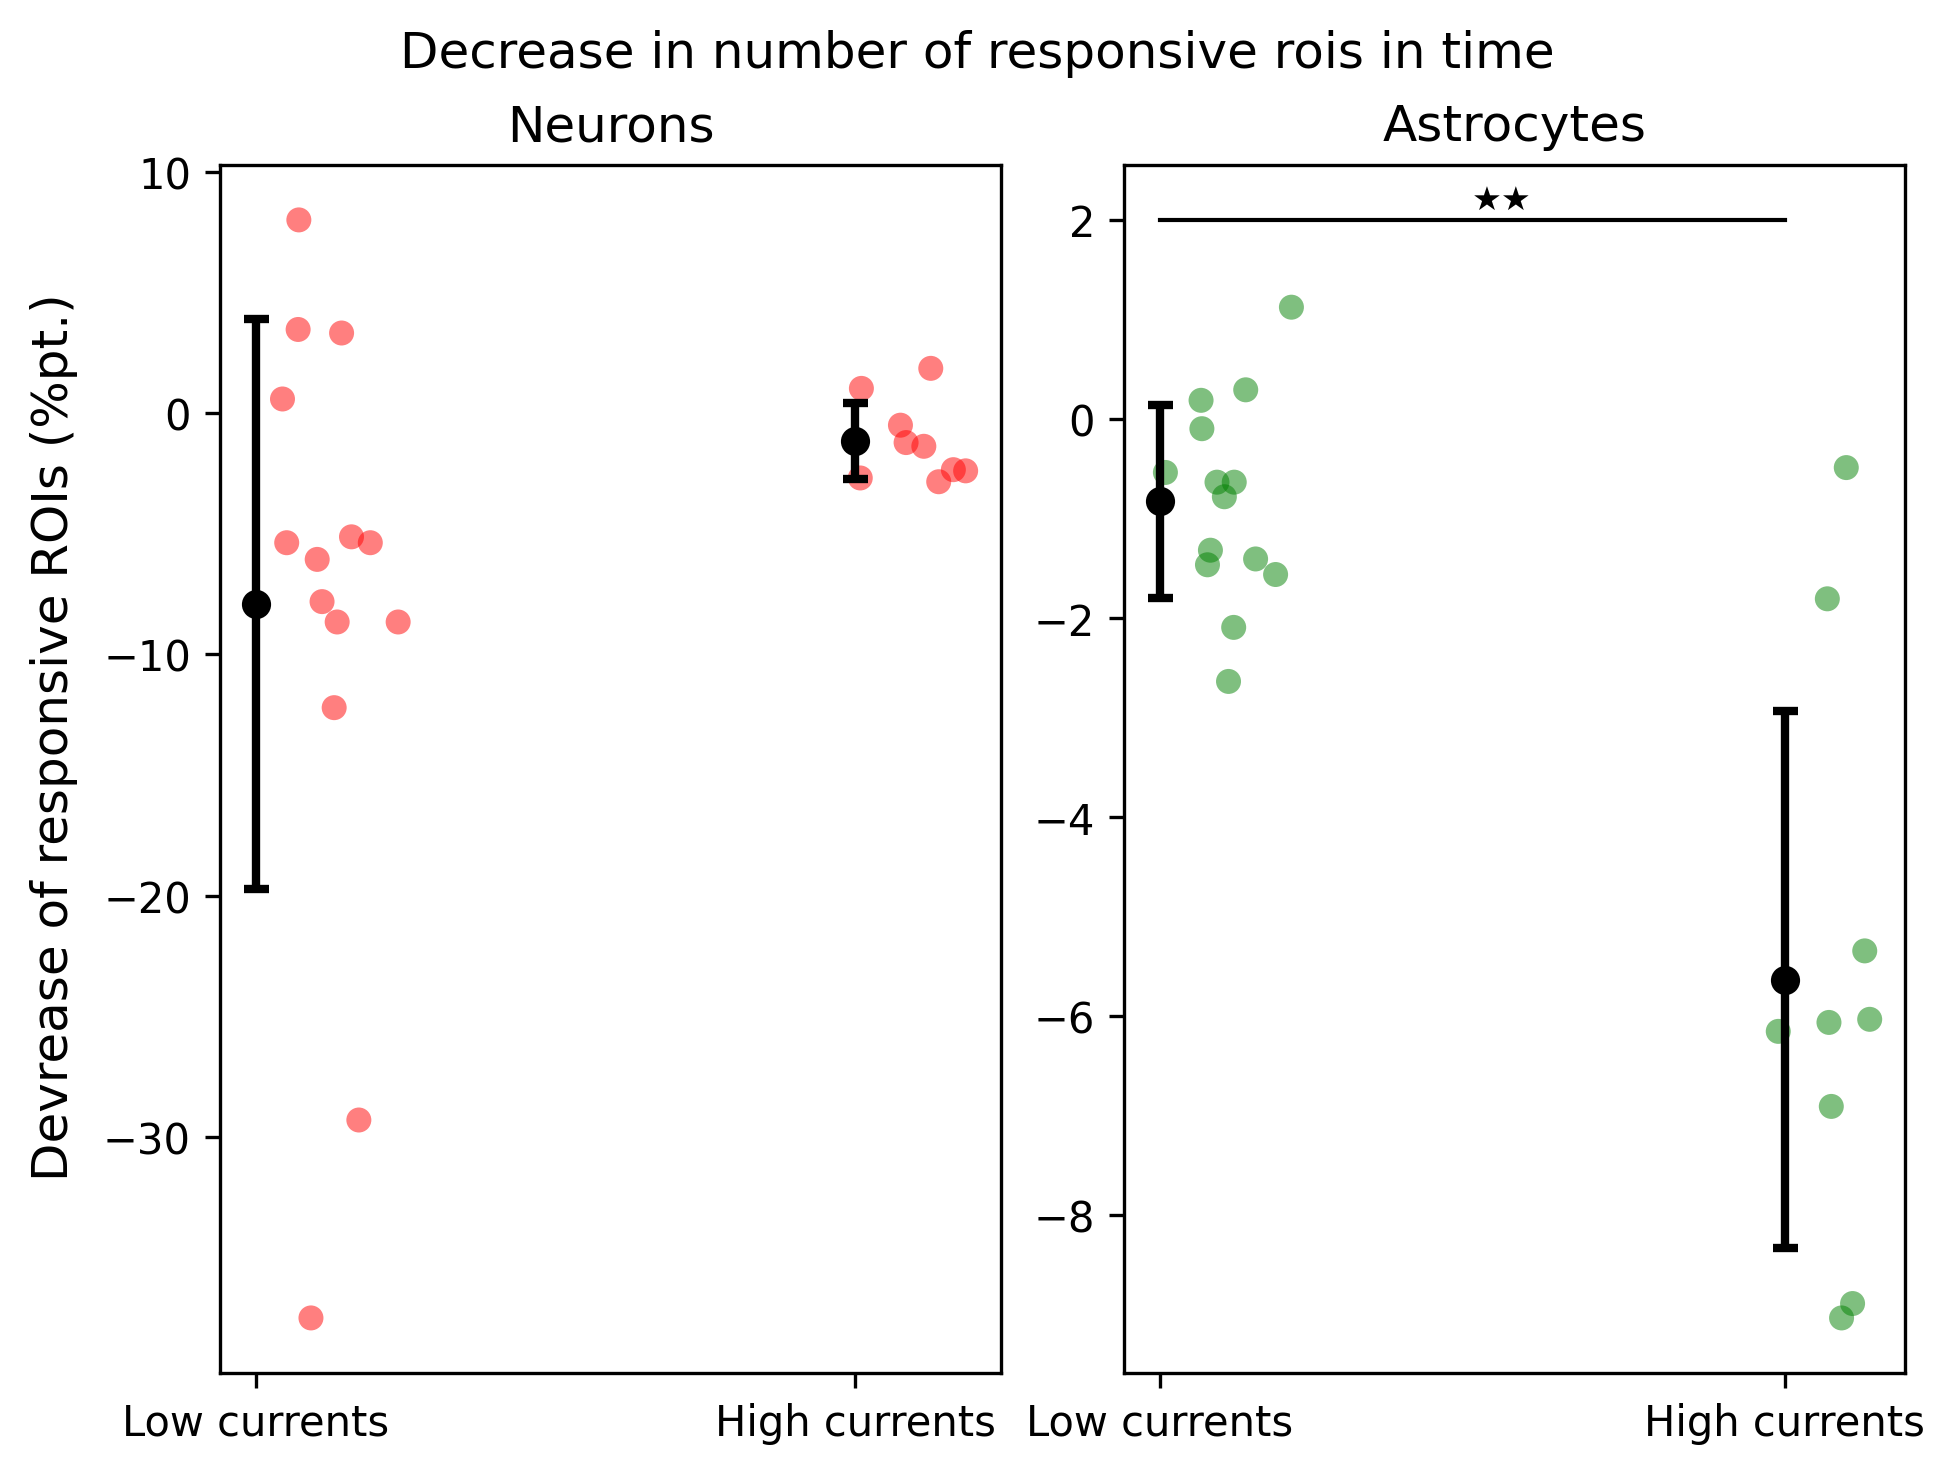

In [ ]:
fig, ax = plt.subplots(1, 2, dpi = 300, layout = 'compressed')
low_ndiffs, low_adiffs = [],[]
high_ndiffs, high_adiffs = [],[]
for index, d in enumerate((neuron_dict, astro_dict)):
    color = 'green' if index else 'red'
    for cur_index, current in enumerate(consts.CURRENTS):
        func = lambda line: (line[8] + line[9])/2 - (line[0] + line[1])/2
        diff = np.apply_along_axis(func, axis=1, arr = d[current])
        if index == 0:
            low, high = low_ndiffs, high_ndiffs
        else:
            low, high = low_adiffs, high_adiffs

        if current < 50:
            low.extend(diff)
        else:
            high.extend(diff)
        
    ax[index].scatter(
        np.random.normal(0.1, 0.05, len(low)), 
        low, 
        color = color, 
        alpha = 0.5,
        edgecolors = 'none')
    ax[index].scatter(
        np.random.normal(1.1, 0.05, len(high)), 
        high, 
        color = color, 
        alpha = 0.5,
        edgecolors = 'none')
    
    ax[index].errorbar(
        0, 
        np.average(low), 
        yerr = np.std(low), 
        color = 'black', 
        fmt = 'o', 
        capsize = 3,
        capthick = 2,
        linewidth = 2)

    ax[index].errorbar(
        1, 
        np.average(high), 
        yerr = np.std(high), 
        color = 'black', 
        fmt = 'o', 
        capsize = 3,
        capthick = 2,
        linewidth = 2)


    
    ax[index].set_xticks((0,1), labels = ['Low currents', 'High currents'])
ax[0].set_title("Neurons")
ax[1].set_title("Astrocytes")
fig.suptitle("Decrease in number of responsive rois in time")
ax[1].plot([0, 1], [2, 2], color = 'black', linewidth = 1)
transform = mtl.transforms.blended_transform_factory(ax[1].transData, ax[1].transData)
ax[1].text(0.5, 2.1, "★★", fontsize = 8, transform = transform,)
fig.supylabel('Devrease of responsive ROIs (%pt.)')

# nasa.plotting.save_fig(fig, 3, 'Decrease in responsive rois (high vs low currents) - std')


In [122]:
scipy.stats.mannwhitneyu(low_adiffs, high_adiffs), scipy.stats.mannwhitneyu(low_ndiffs, high_ndiffs)

(MannwhitneyuResult(statistic=114.0, pvalue=0.001462683118374429),
 MannwhitneyuResult(statistic=34.0, pvalue=0.07245970586458506))

In [26]:
for diffs in (low_adiffs, high_adiffs, low_ndiffs, high_ndiffs):
    print(scipy.stats.wilcoxon(diffs))

WilcoxonResult(statistic=13.0, pvalue=0.013127850294110933)
WilcoxonResult(statistic=0.0, pvalue=0.00390625)
WilcoxonResult(statistic=15.0, pvalue=0.018508823031333697)
WilcoxonResult(statistic=7.0, pvalue=0.07421875)
